<a href="https://colab.research.google.com/github/Satya-1729/Python_machine_learning/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install --upgrade tensorflow

[[25.  8.  9. 12.]
 [20.  6.  7.  8.]
 [30.  9.  8. 15.]
 [35.  7.  8. 18.]
 [40.  9.  9. 20.]]
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2814
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5054
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3187
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1426
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0603
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0276
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0131
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0063
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0031
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0015


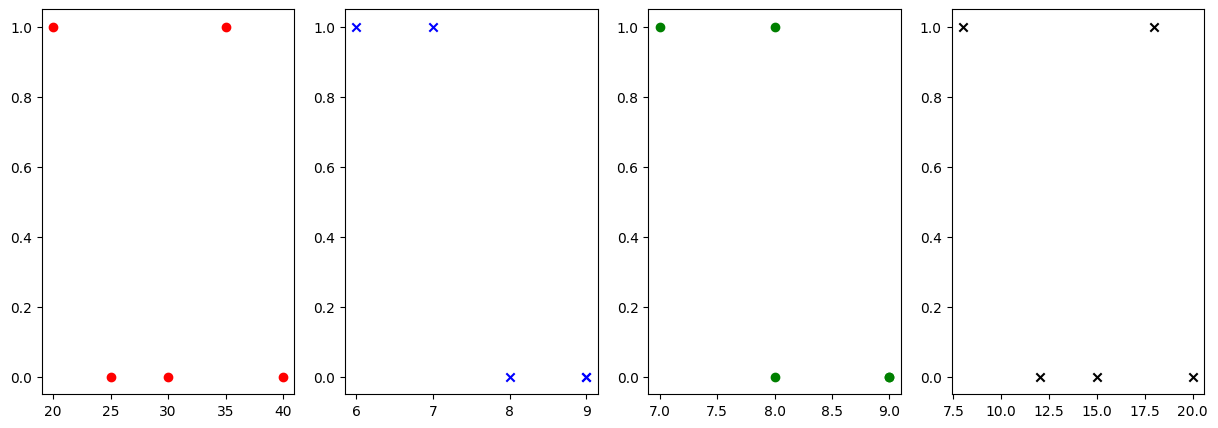

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Normalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

# Define the dataset as a NumPy array
shirt_data = np.array([
    ["Shirt_ID", "Brand", "Material", "Price", "Durability_Rating", "Style", "Comfort_Rating",
     "Sales_Last_Year", "Return_Rate", "Production_Cost", "Environmental_Impact", "Customer_Feedback",
     "Reliability_Score", "Popularity", "Market_Trend"],

    [1, "Zara", "Cotton", 25, 8, "Casual", 9, 15000, "3%", 12, "Medium", 4.5, 8.5, "High", "Increasing"],
    [2, "H&M", "Polyester", 20, 6, "Formal", 7, 12000, "5%", 8, "High", 4.0, 6.7, "Medium", "Stable"],
    [3, "Nike", "Dri-Fit", 30, 9, "Sports", 8, 18000, "2%", 15, "Low", 4.7, 8.9, "High", "Increasing"],
    [4, "Uniqlo", "Linen", 35, 7, "Casual", 8, 14000, "4%", 18, "Medium", 4.3, 7.5, "Medium", "Stable"],
    [5, "Levi’s", "Cotton", 40, 9, "Formal", 9, 16000, "3%", 20, "Low", 4.8, 8.9, "High", "Increasing"]
])

shirt_data


df = pd.DataFrame(shirt_data)
df

df1 = df.copy()
x_train = df1.iloc[1:,[3,4,6,9]].to_numpy()
x_train = x_train.astype(float)
print(x_train)

le = LabelEncoder()
y_train = df1.iloc[1:,-1]

y_train = le.fit_transform(y_train)
y_train

y_train = y_train.reshape(-1,1)
y_train





fig, ax = plt.subplots(1,4, figsize=(15,5))
ax[0].scatter(x_train[:,0], y_train, color='red', marker='o', label='price v/s output')
ax[1].scatter(x_train[:,1], y_train, color = 'blue', marker='x', label='durability v/s output')
ax[2].scatter(x_train[:,2], y_train, color = 'green', marker='o', label='comfort v/s output')
ax[3].scatter(x_train[:,3], y_train, color = 'black', marker='x', label = 'market trend v/s output')

# #creating the normalization layer
# x_norm = tf.keras.Normalization(axis=-1)
# x_norm.adapt(x_train)

# X_norm = x_norm(x_train)
# X_norm

# tile function in numpy will copy our data i.e, 10000rows x existing rows in the dataset and
# 1 columns x existing columns in the dataset
x_train = np.tile(x_train, (10000,1))
x_train

y_train = np.tile(y_train, (10000,1))
y_train

model = Sequential([
    Dense(units=3, activation ='relu',name = "L1"),
    Dense(units=1, activation = 'sigmoid',name = "L2")
])

model.compile(
    loss = BinaryCrossentropy(),
    optimizer = Adam(learning_rate=0.001),

    )

model.fit(x_train, y_train, epochs=10)


In [42]:
y_pred = model.predict(x_train)
print(y_pred,"\n\n\n")
w,b = model.get_layer('L1').get_weights()
print(w,"\n\n\n")
print(b,"\n\n\n")


w1,b1 = model.get_layer('L2').get_weights()
print(w1,"\n\n\n")
print(b1,"\n\n\n")



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
[[2.8087909e-04]
 [9.9831140e-01]
 [4.8948117e-09]
 ...
 [4.8948117e-09]
 [9.9831140e-01]
 [8.3916314e-04]] 



[[-0.66540587 -0.31771752 -0.2770456 ]
 [-0.76757926  1.8000622   0.3517729 ]
 [ 0.12697363 -0.51950115 -0.46930203]
 [ 0.91228676  0.34852073  0.4131788 ]] 



[ 0.        -3.6038315  0.       ] 



[[ 0.01349866]
 [-6.168052  ]
 [-1.0707916 ]] 



[6.3821764] 





In [43]:
for j in range(y_pred.shape[0]):
  if y_pred[j] > 0.5 :
    y_pred[j] = 1
  else:
    y_pred[j] = 0

  if y_pred[j] == y_train[j]:
    print("correct")
  else:
    print("incorrect")
    break;
print(y_pred)



Streaming output truncated to the last 5000 lines.
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
corre

In [37]:
# now we will refine our code
#and try to remove the round off error

model = Sequential([
    Dense(units=3, activation ='relu',name = "L1"),
    Dense(units=1, activation = 'linear',name = "L2")
])

model.compile(
    loss = BinaryCrossentropy(from_logits = True),
    optimizer = Adam(learning_rate=0.001),

    )

model.fit(x_train, y_train, epochs=100)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.5918
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4061
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2496
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.1412
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.0748
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0380
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0184
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0087
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0040
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0018
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.2500e-04
Epoch 12/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.6994e-04
Epoch 13/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6777e-04
Epoch 14/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.4418e

In [46]:
logits = model.predict(x_train)
y_pred1 = tf.math.sigmoid(logits)
y_pred1 = y_pred1.numpy().reshape(-1)
print(y_pred1,"\n\n\n")

for j in range(y_pred.shape[0]):
  if y_pred1[j] > 0.5 :
    y_pred1[j] = 1
  else:
    y_pred1[j] = 0

  if y_pred1[j] == y_train[j]:
    print("correct")
  else:
    print("incorrect")

print(y_pred1)



Streaming output truncated to the last 5000 lines.
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
incorrect
incorrect
correct
correct
correct
i